# Visualizing ZDF files

This notebook can be used to quickly visualize ZDF files.

## Main routines

### Grid data

* `grid2d` - Open a `.zdf` grid file and produce a 2D (colormap) plot

### Particle data

* `part2D`- Open a `.zdf` particle file and produce a 2D (scatter) plot with the selected quantities
* `histogram` - Open a `.zdf` particle file and produce a histogram plot of the selected quantity

## Example

Visualize file `test-000000.zdf`:

```python
import visxd
visxd.grid2d( "test-000000.zdf" )
```


## All vector components for a given timestep

To plot all the vector field components for a given timestep you can use the utiliy function `vfld2D( fld, iter )` below:

```python
vfld2d( "CURRENT/J", 100 )
```

The `fld` parameter should include the path towards the file.

In [1]:
import visxd
import os.path
import sys

def plot_vfld( fld, iter, xlim = None, ylim = None, grid = False, cmap = "RdBu", vsim = True ):
    print("Plotting {} field components for iteration {}.".format(fld,iter))
    
    for comp in ['x','y','z']:
        file = "{}{}-{:06d}.zdf".format(fld,comp,iter)
        if ( os.path.exists(file) ):
            visxd.grid2d(file, xlim = xlim, ylim = ylim, grid = grid, cmap = cmap, vsim = vsim )
        else:
            print("(*error*) file {} not found.".format(file), file = sys.stderr )


Plotting EMF/B field components for iteration 500.


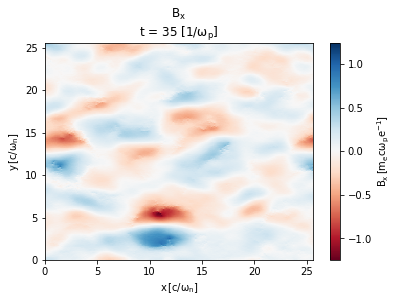

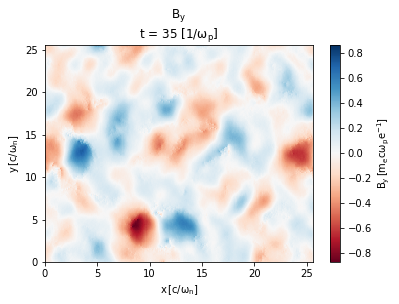

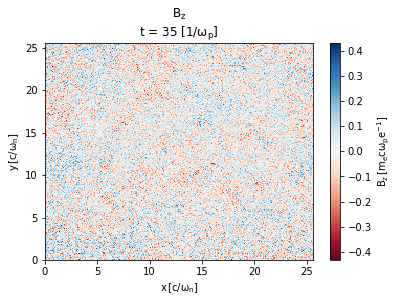

Plotting EMF/E field components for iteration 500.


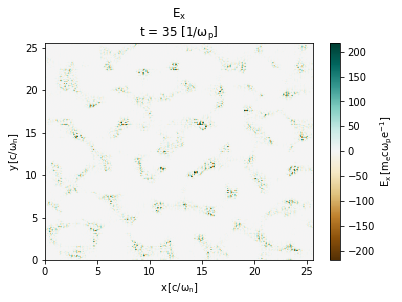

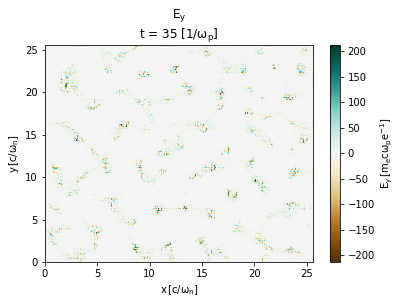

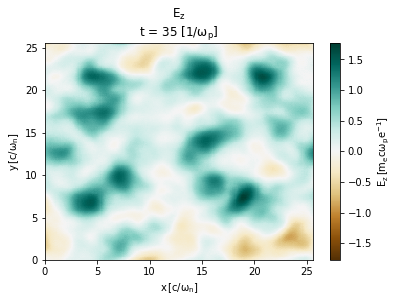

In [2]:
plot_vfld("EMF/B", 500 )
plot_vfld("EMF/E", 500, cmap = "BrBG" )

Plotting B field components for iteration 500.


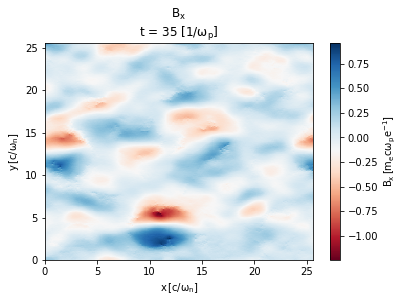

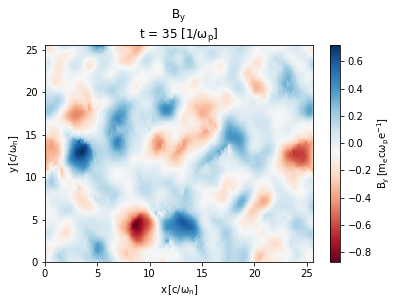

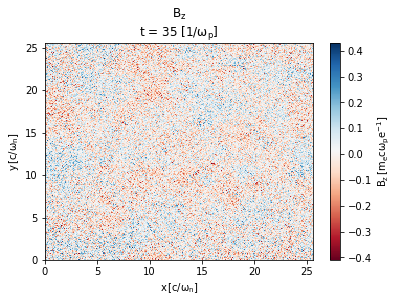

In [3]:
plot_vfld("B", 500, "EMF")

In [ ]:
def vector2d( filename1, filename2, xlim = None, ylim = None, grid = False, cmap = None ):
    """Generates a colormap plot from a 2D grid zdf file

    Args:
        filename (str):
            Name of ZDF file to open
        xlim (tuple, optional):
            Lower and upper limits of x axis. Defaults to the x limits of the grid data.
        ylim (tuple, optional):
            Lower and upper limits of y axis. Defaults to the y limits of the grid data.
        grid (bool, optional):
            Display a grid on top of colormap. Defaults to False.
        cmap (str, optional):
            Name of the colormap to use. Defaults to the matplotlib imshow() colormap.
    """

    if ( not os.path.exists(filename1) ):
        raise FileNotFoundError( filename1 ) 

    if ( not os.path.exists(filename2) ):
        raise FileNotFoundError( filename2 ) 

    (data1, info1) = zdf.read(filename1)

    if ( info.type != "grid" ):
        print("(*error*) file {} is not a grid file".format(filename))
        return
    
    if ( info.grid.ndims != 2 ):
        print("(*error*) file {} is not a 2D grid file".format(filename))
        return

    range = [
        [info.grid.axis[0].min, info.grid.axis[0].max],
        [info.grid.axis[1].min, info.grid.axis[1].max]
    ]

    plt.imshow( data, interpolation = 'nearest', origin = 'lower',
            extent = ( range[0][0], range[0][1], range[1][0], range[1][1] ),
            aspect = 'auto', cmap=cmap )

    zlabel = "{}\,[{:s}]".format( info.grid.label, info.grid.units )

    plt.colorbar().set_label(r'$\sf{' + zlabel + r'}$')

    xlabel = "{}\,[{:s}]".format( info.grid.axis[0].label, info.grid.axis[0].units )
    ylabel = "{}\,[{:s}]".format( info.grid.axis[1].label, info.grid.axis[1].units )

    plt.xlabel(r'$\sf{' + xlabel + r'}$')
    plt.ylabel(r'$\sf{' + ylabel + r'}$')

    plt.title("$\sf {} $\nt = ${:g}$ [$\sf {}$]".format(
        info.grid.label.replace(" ","\;"),
        info.iteration.t,
        info.iteration.tunits))

    if ( xlim ):
        plt.xlim(xlim)
    if ( ylim ):
        plt.ylim(ylim)

    plt.grid(grid)

    plt.show()